**Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Loading necessary libraries**

In [1]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

import re
from collections import Counter
from scipy.stats import ttest_ind

In [3]:
transactionData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Quantium Project Data Analysis/QVI_transaction_data.csv')
customerData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Quantium Project Data Analysis/QVI_purchase_behaviour.csv')
td = transactionData
cd = customerData
print('Transaction data\n',transactionData.head())
print('Customer data\n',customerData.head())

Transaction data
     DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  
Customer data
    LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES    

In [4]:
td.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

 **As the dates were in Int format we convert it to date_time format of pandas**

In [5]:
td['DATE'] = pd.to_datetime(td['DATE'],unit='D', origin='1899-12-30')

In [6]:
td.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
td['PROD_NAME']

0           Natural Chip        Compny SeaSalt175g
1                         CCs Nacho Cheese    175g
2           Smiths Crinkle Cut  Chips Chicken 170g
3           Smiths Chip Thinly  S/Cream&Onion 175g
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream 175g
264832               Tostitos Splash Of  Lime 175g
264833                    Doritos Mexicana    170g
264834     Doritos Corn Chip Mexican Jalapeno 150g
264835               Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264836, dtype: object

We need to identify what unwanted characters do we have.

In [ ]:
'''
# Create a list of characters
chars = ['/', '&']

# Define a custom function to count the occurrences of characters
def count_chars(val):
    count = {char: val.count(char) for char in chars}
    return count

# Use the apply method to apply the custom function to each value in the column
result = td['PROD_NAME'].apply(count_chars)

# Create a new DataFrame with the results and the original values
df_char_counts = pd.DataFrame(zip(td['PROD_NAME'], result), columns=['PROD_NAME', 'char_count'])

# Get the total number of occurrences of each symbol
symbol_counts = df_char_counts['char_count'].apply(pd.Series).sum()

print(symbol_counts)
'''

/    13813
&    82244
dtype: int64


In [ ]:
#df_char_counts.sum()

PROD_NAME     Natural Chip        Compny SeaSalt175gCCs Nach...
char_count                                                96057
dtype: object

Now time to remove all the unwanted characters like &,/ etc.

In [ ]:
# Use a regular expression to extract the weight from the 'PROD_NAME' column
td['package_weight'] = td['PROD_NAME'].str.extract(r'(\d+g)$')
td['package_weight']

0         175g
1         175g
2         170g
3         175g
4         150g
          ... 
264831    175g
264832    175g
264833    170g
264834    150g
264835    175g
Name: package_weight, Length: 264836, dtype: object

In [ ]:
td['PROD_NAME']

0           Natural Chip        Compny SeaSalt175g
1                         CCs Nacho Cheese    175g
2           Smiths Crinkle Cut  Chips Chicken 170g
3           Smiths Chip Thinly  S/Cream&Onion 175g
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream 175g
264832               Tostitos Splash Of  Lime 175g
264833                    Doritos Mexicana    170g
264834     Doritos Corn Chip Mexican Jalapeno 150g
264835               Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264836, dtype: object

In [ ]:
# Use a regular expression to remove all special characters from the 'PROD_NAME' column
td['PROD_NAME'] = td['PROD_NAME'].str.replace(r'[^a-zA-Z0-9\s]', '')

<ipython-input-9-7df840c1550f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  td['PROD_NAME'] = td['PROD_NAME'].str.replace(r'[^a-zA-Z0-9\s]', '')


In [ ]:
td.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion 175g,5,15.0,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili 150g,3,13.8,150g


In [ ]:
# Use a regular expression to remove the weight from the 'PROD_NAME' column
td['PROD_NAME'] = td['PROD_NAME'].str.replace(r'\d+g', '')

# Split the values in the 'PROD_NAME' column into a list of words
words = td['PROD_NAME'].str.split()

# Flatten the list of words into a single list
all_words = [word for sublist in words for word in sublist]

# Use the Counter class to count the occurrences of each word
word_counts = Counter(all_words)

# Sort the values by frequency
sorted_word_counts = word_counts.most_common()

print(sorted_word_counts)

<ipython-input-11-d6efebc8a2cf>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  td['PROD_NAME'] = td['PROD_NAME'].str.replace(r'\d+g', '')


[('Chips', 49770), ('Kettle', 41288), ('Smiths', 28860), ('Salt', 27976), ('Cheese', 27890), ('Pringles', 25102), ('Doritos', 24962), ('Crinkle', 23960), ('Corn', 22063), ('Original', 21560), ('Cut', 20754), ('Chip', 18645), ('Chicken', 18577), ('Salsa', 18094), ('Sea', 14145), ('Thins', 14075), ('Chilli', 13895), ('Sour', 13882), ('Crisps', 12607), ('Vinegar', 12402), ('RRD', 11894), ('Infuzions', 11057), ('Supreme', 10963), ('WW', 10320), ('Cobs', 9693), ('Popd', 9693), ('Tortilla', 9580), ('Tostitos', 9471), ('Twisties', 9454), ('Sensations', 9429), ('Old', 9324), ('El', 9324), ('Paso', 9324), ('Dip', 9324), ('Sweet', 7883), ('Lime', 7852), ('Chives', 7846), ('Tomato', 7669), ('Cream', 7618), ('Thinly', 7507), ('Tyrrells', 6442), ('And', 6373), ('BBQ', 6351), ('Tangy', 6332), ('Grain', 6272), ('Waves', 6272), ('Lightly', 6248), ('Salted', 6248), ('Soy', 6121), ('Natural', 6050), ('Mild', 6048), ('Red', 5885), ('Rock', 5885), ('Deli', 5885), ('Thai', 4737), ('Burger', 4733), ('Swt', 

In [ ]:
td.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion,5,15.0,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili,3,13.8,150g


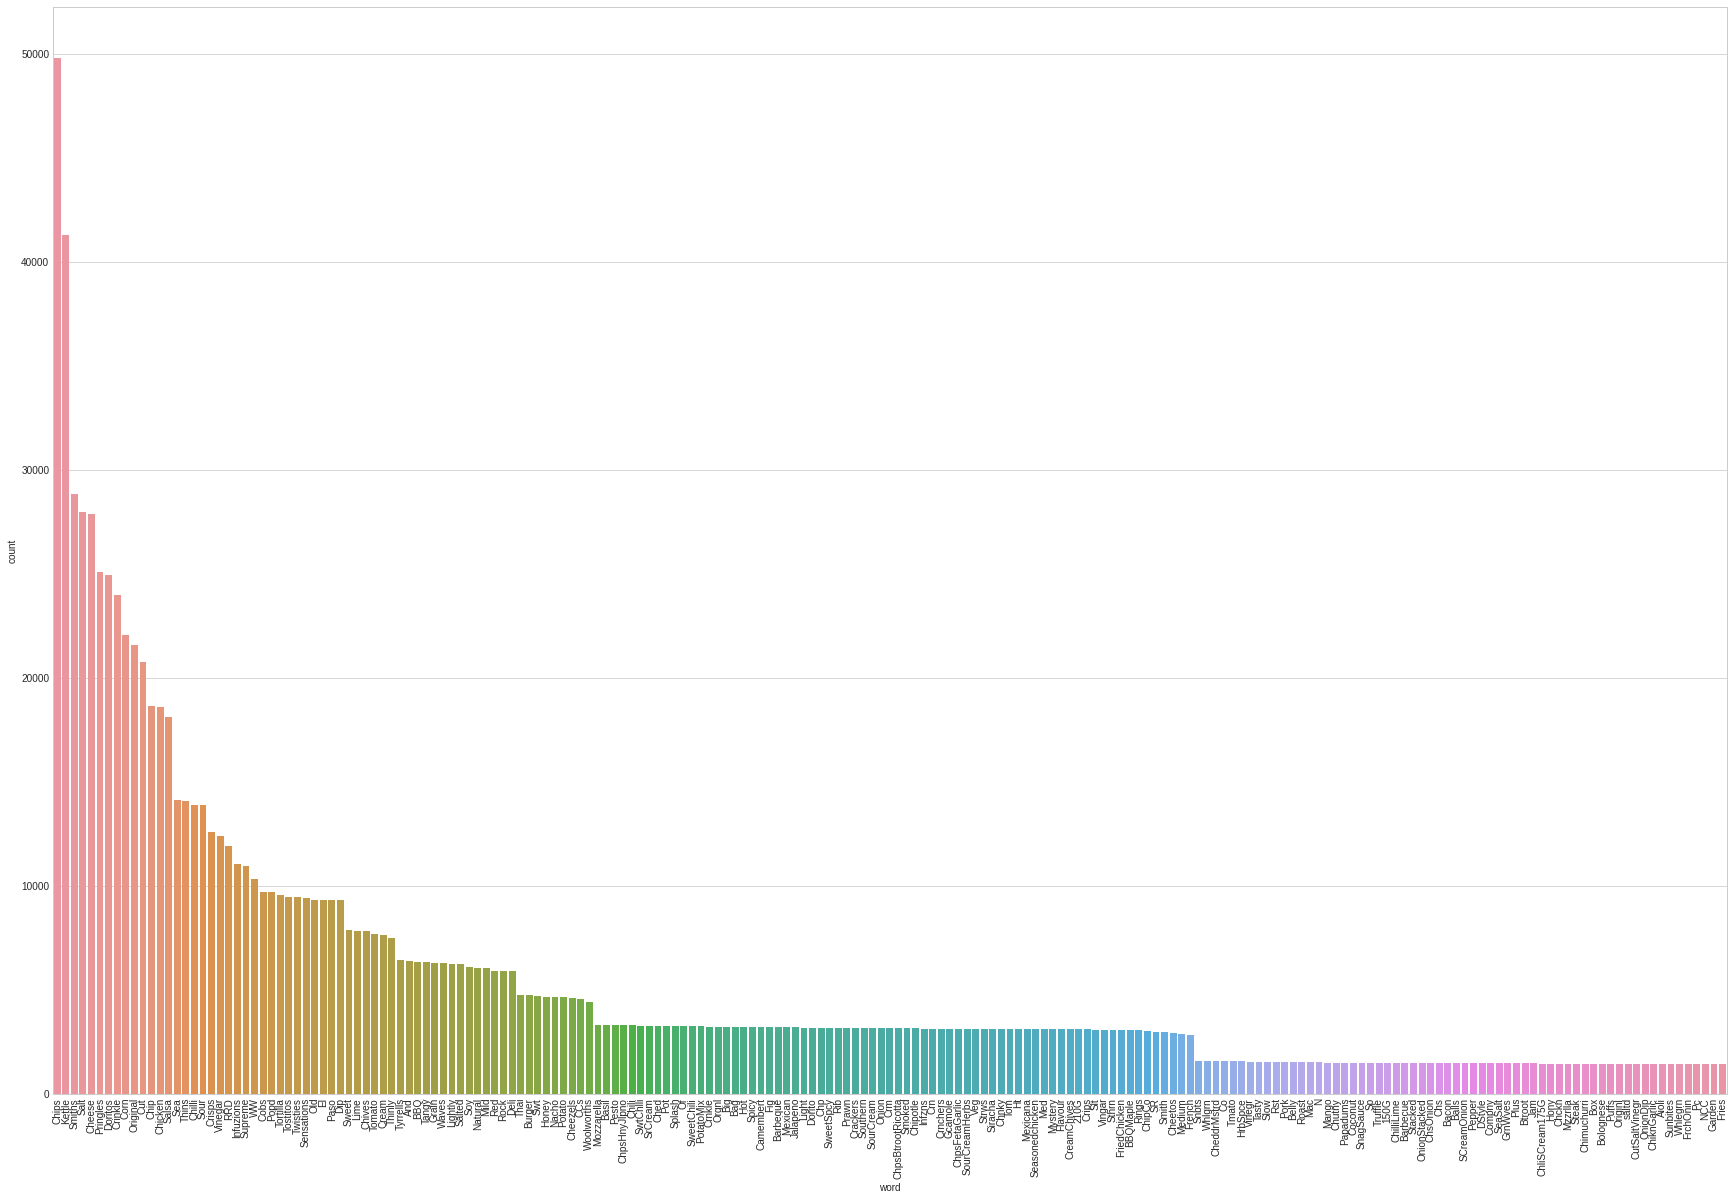

In [ ]:
# Extract the words and counts into separate lists
words = [word for word, count in sorted_word_counts]
counts = [count for word, count in sorted_word_counts]

# Create a DataFrame from the lists
df = pd.DataFrame({'word': words, 'count': counts})

# Set the plot size
plt.figure(figsize=(30, 20))

# Create a bar plot of the word counts using seaborn
sns.barplot(x='word', y='count', data=df)
# Rotate the x-axis labels
plt.xticks(rotation=90)
# Show the plot
plt.show()

(0.0, 10.0)

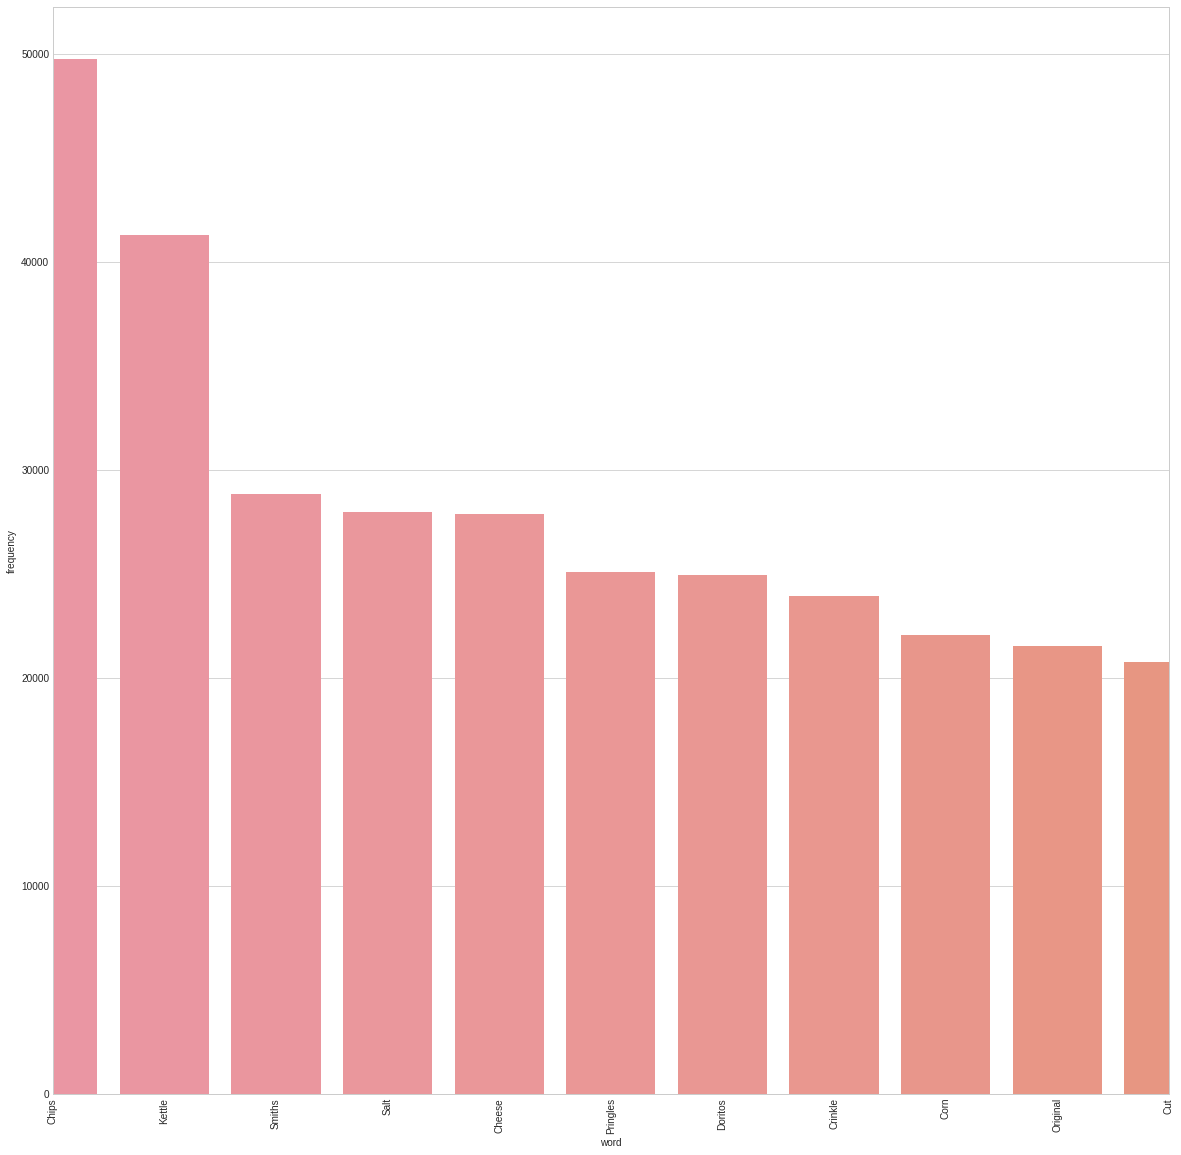

In [ ]:

# Create a dataframe with the word frequencies
tf = pd.DataFrame(sorted_word_counts, columns=['word', 'frequency'])

# Set the size of the plot
plt.figure(figsize=(20,20))

# Create a bar plot of the word frequencies using seaborn
sns.barplot(x='word', y='frequency', data=tf)

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Zoom in on the x-axis
plt.xlim(left=0, right=10)

In [ ]:
print(type(sorted_word_counts))
print(type(words))

<class 'list'>
<class 'list'>


In [ ]:
td['PROD_NAME'].str.contains('Salsa')

18094

In [ ]:
salsa_rows = td[td['PROD_NAME'].str.contains('Salsa')]
salsa_rows.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild,1,5.1,300g
25,2019-05-15,39,39144,35506,57,Old El Paso Salsa Dip Tomato Mild,1,5.1,300g
32,2019-05-20,45,45127,41122,64,Red Rock Deli SR Salsa Mzzrlla,2,5.4,150g
44,2018-08-18,56,56013,50090,39,Smiths Crinkle Cut Tomato Salsa,1,2.6,150g
63,2019-05-15,82,82480,82047,101,Doritos Salsa Medium,1,2.6,300g


Removing the products with dip in them as we only need chips.

In [ ]:
x = td[~td['PROD_NAME'].str.contains('Dip|dip')] 
x.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion,5,15.0,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili,3,13.8,150g


In [ ]:
dip = x[x['PROD_NAME'].str.contains('Dip' or 'dip')]
dip.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight


In [ ]:
x['package_weight'].isnull().sum()

9321

In [ ]:
x.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
package_weight            object
dtype: object

Even after removing the 'dips' we still have some dips left and also our weight feature is an object. We need to remove the g from the weight column and convert it to int.

In [ ]:
x['package_weight'] = x['package_weight'].str.replace('g', '')


<ipython-input-20-c57f1dafbc73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['package_weight'] = x['package_weight'].str.replace('g', '')


In [ ]:
x

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili,3,13.8,150
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,2,10.8,175
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,1,4.4,175
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana,2,8.8,170
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,2,7.8,150


In [ ]:
x.isnull().sum(0)

DATE                 0
STORE_NBR            0
LYLTY_CARD_NBR       0
TXN_ID               0
PROD_NBR             0
PROD_NAME            0
PROD_QTY             0
TOT_SALES            0
package_weight    9321
dtype: int64

In [ ]:
x[x['package_weight'].isnull()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight
9,2018-08-18,7,7150,6900,52,Grain Waves Sour CreamChives 210G,2,7.2,NaN
34,2018-08-16,51,51100,46802,48,Red Rock Deli Sp Salt Truffle 150G,1,2.7,NaN
35,2018-08-19,51,51100,46803,37,Smiths Thinly Swt ChliSCream175G,1,3.0,NaN
65,2019-05-20,83,83008,82099,63,Kettle Swt Pot Sea Salt,2,8.4,NaN
153,2019-05-17,208,208139,206906,63,Kettle Swt Pot Sea Salt,1,4.2,NaN
...,...,...,...,...,...,...,...,...,...
264725,2018-07-20,266,266413,264246,63,Kettle Swt Pot Sea Salt,1,4.2,NaN
264733,2019-05-11,266,266432,264264,48,Red Rock Deli Sp Salt Truffle 150G,1,2.7,NaN
264745,2018-07-03,268,268200,264615,52,Grain Waves Sour CreamChives 210G,1,3.6,NaN
264767,2019-06-08,269,269133,265839,63,Kettle Swt Pot Sea Salt,2,8.4,NaN


In [ ]:
x[x['PROD_NBR'] == 63]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight
65,2019-05-20,83,83008,82099,63,Kettle Swt Pot Sea Salt,2,8.4,135
153,2019-05-17,208,208139,206906,63,Kettle Swt Pot Sea Salt,1,4.2,135
174,2018-08-20,237,237227,241132,63,Kettle Swt Pot Sea Salt,2,8.4,135
177,2019-05-17,243,243070,246706,63,Kettle Swt Pot Sea Salt,1,4.2,135
348,2018-10-26,7,7077,6604,63,Kettle Swt Pot Sea Salt,2,8.4,135
...,...,...,...,...,...,...,...,...,...
264564,2018-10-08,260,260240,259480,63,Kettle Swt Pot Sea Salt,2,8.4,135
264574,2019-06-12,261,261035,259860,63,Kettle Swt Pot Sea Salt,2,8.4,135
264725,2018-07-20,266,266413,264246,63,Kettle Swt Pot Sea Salt,1,4.2,135
264767,2019-06-08,269,269133,265839,63,Kettle Swt Pot Sea Salt,2,8.4,135


In [ ]:
td.isnull().sum()

DATE                 0
STORE_NBR            0
LYLTY_CARD_NBR       0
TXN_ID               0
PROD_NBR             0
PROD_NAME            0
PROD_QTY             0
TOT_SALES            0
package_weight    9321
dtype: int64

Now after inspecting the data further I found two things under PROD_NAME column
1. There were still some names with their weights written in caps like 180G.
2. There is a particular chips with no weight. I found the weight off of internet and appended the value to fill all the missing values.
Below there's a function to do these two steps.

In [ ]:
def extract_weight(row):
    # If the 'package_weight' value is not missing
    if not pd.isna(row['package_weight']):
        return row['package_weight']
    
    weight_pattern = r'(\d+g)'
    match = re.search(weight_pattern, row['PROD_NAME'])
    if match:
        return int(match.group(1)[:-1])
    else:
        return 135

In [ ]:
x['package_weight'] = x.apply(extract_weight, axis=1)

<ipython-input-22-e607603ae7f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['package_weight'] = x.apply(extract_weight, axis=1)


In [ ]:
# Convert the 'package_weight' column to integers
x['package_weight'] = x['package_weight'].astype(int)

<ipython-input-23-1b3db74a917d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['package_weight'] = x['package_weight'].astype(int)


In [ ]:
x.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili,3,13.8,150


In [ ]:
x.sort_values(by='package_weight', ascending=False)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight
207276,2019-04-07,69,69126,66643,4,Dorito Corn Chp Supreme,2,13.0,380
108340,2018-12-10,123,123103,126532,14,Smiths Crnkle Chip Orgnl Big Bag,2,11.8,380
108382,2018-10-10,123,123255,127123,4,Dorito Corn Chp Supreme,2,13.0,380
108380,2019-04-07,123,123248,127089,4,Dorito Corn Chp Supreme,2,13.0,380
78005,2019-04-15,203,203149,202908,14,Smiths Crnkle Chip Orgnl Big Bag,2,11.8,380
...,...,...,...,...,...,...,...,...,...
61414,2018-09-06,109,109156,111110,38,Infuzions Mango Chutny Papadums,2,4.8,70
141817,2019-02-28,111,111145,113309,38,Infuzions Mango Chutny Papadums,1,2.4,70
10398,2019-05-31,114,114253,118502,38,Infuzions Mango Chutny Papadums,2,4.8,70
212729,2019-04-07,179,179062,179630,38,Infuzions Mango Chutny Papadums,2,4.8,70


In [ ]:
x['package_weight'].unique()

array([175, 170, 150, 330, 210, 135, 270, 220, 125, 110, 134, 380, 180,
       165, 300, 250, 200, 160, 190,  90,  70])

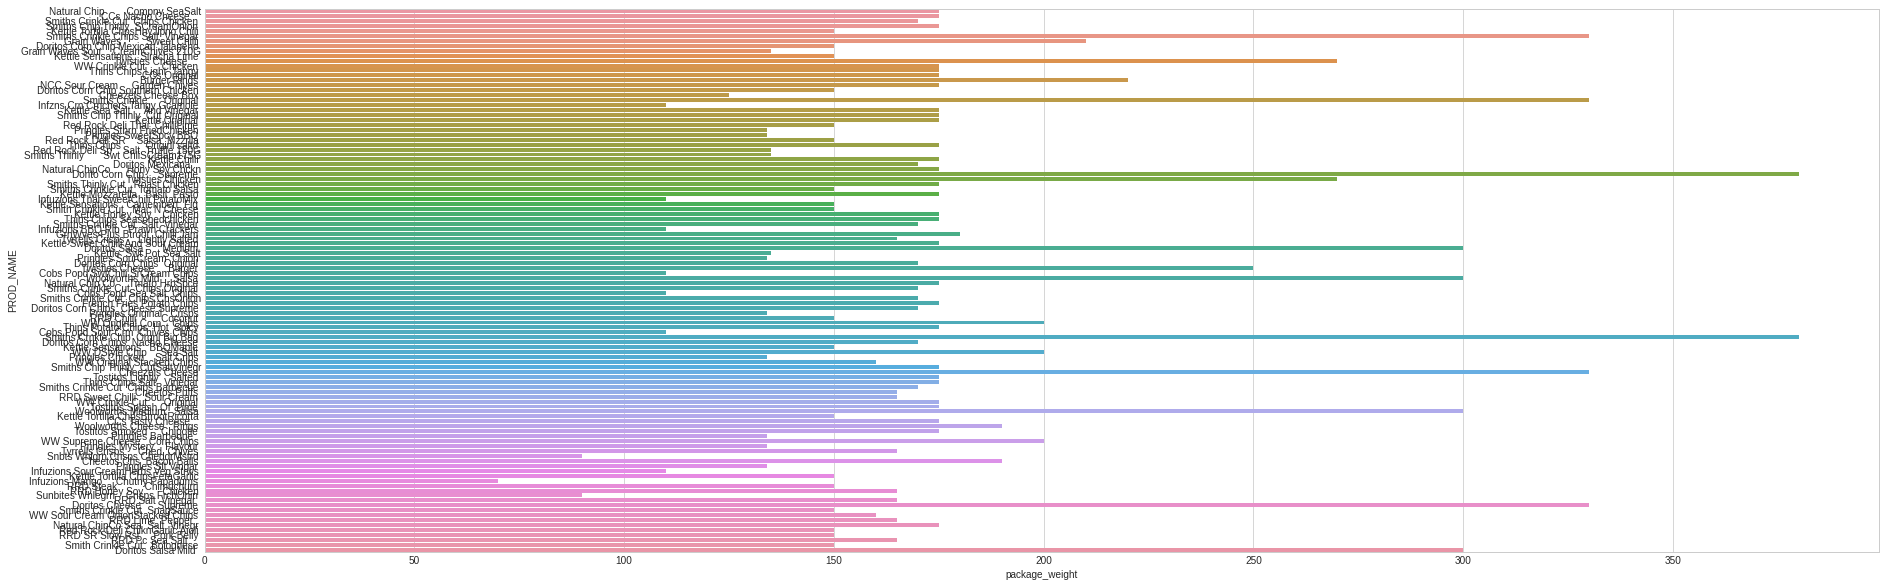

In [ ]:
plt.figure(figsize=(30, 10))
sns.barplot(x='package_weight', y='PROD_NAME', data=x)

As there are a lot of Salsa dip products we need to drop those rows.

In [ ]:
x = x[~x['PROD_NAME'].str.contains('Salsa')]

In [ ]:
x['PROD_NAME'].str.contains('Salsa').sum()

0

In [ ]:
x.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,package_weight
count,245304.000000,2.453040e+05,2.453040e+05,245304.000000,245304.000000,245304.000000,245304.000000
mean,135.053322,1.355352e+05,1.351340e+05,56.054883,1.908200,7.335517,174.455993
std,76.796402,8.074658e+04,7.815838e+04,33.569505,0.661172,3.080377,59.747883
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,70.000000
25%,70.000000,7.001400e+04,6.755875e+04,26.000000,2.000000,5.800000,135.000000
50%,130.000000,1.303675e+05,1.351865e+05,52.000000,2.000000,7.400000,170.000000
75%,203.000000,2.030862e+05,2.026662e+05,86.000000,2.000000,8.800000,175.000000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,380.000000


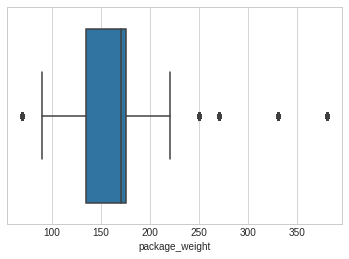

In [ ]:
sns.boxplot(x='package_weight', data=x)

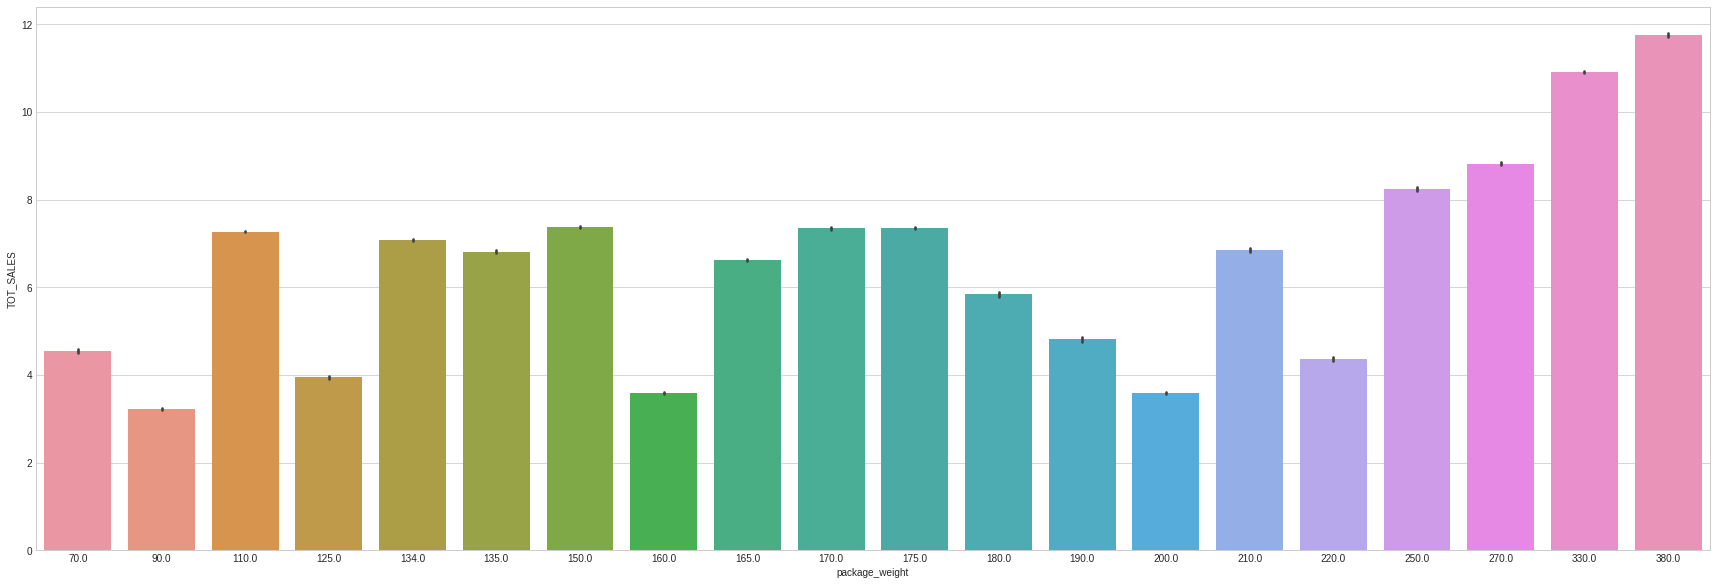

In [ ]:
plt.figure(figsize=(30, 10))
sns.barplot(x='package_weight',y = 'TOT_SALES', data=x,)

We can Clearly see bigger packaged chips have higher sale rate.

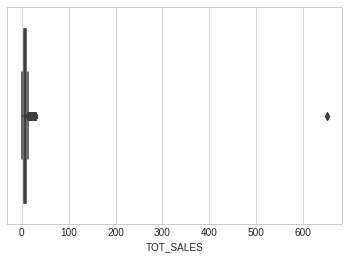

In [ ]:
boxplot_obj = sns.boxplot(x='TOT_SALES', data=x)

In [ ]:
# Calculate the 1st and 99th percentiles
p1 = x['TOT_SALES'].quantile(0.01)
p99 = x['TOT_SALES'].quantile(0.99)

# Filter the dataframe to get the extreme outliers
outliers_sales = x[(x['TOT_SALES'] < p1) | (x['TOT_SALES'] > p99)]

As the Outlier is extreme case and we can't use neither IQR nor quantile 0.99 method. I read the data and made a custom filter using loc[] method.

In [ ]:
outliers_sales.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili,3,13.8,150
11,2018-08-20,8,8294,8221,114,Kettle Sensations Siracha Lime,5,23.0,150
13,2018-08-17,13,13213,12447,92,WW Crinkle Cut Chicken,1,1.7,175
31,2019-05-15,43,43227,40186,26,Pringles SweetSpcy BBQ,4,14.8,134


In [ ]:
x.TOT_SALES.sort_values(ascending = False)                     

69763     650.0
69762     650.0
117850     29.5
69496      29.5
55558      29.5
          ...  
35711       1.7
35712       1.7
118410      1.7
184631      1.7
185355      1.7
Name: TOT_SALES, Length: 245304, dtype: float64

In [ ]:
x.loc[x['TOT_SALES'] > 30]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


In a boxplot, the "whiskers" are the lines extending from the box to the minimum and maximum values of the data. The "caps" are the horizontal lines at the ends of the whiskers. These elements are used to show the range of the data and any potential outliers.

The lower and upper bounds of the whiskers are typically determined using the following formula:

Lower bound = Q1 - 1.5 * IQR
Upper bound = Q3 + 1.5 * IQR

Here, Q1 and Q3 are the first and third quartiles of the data, respectively, and IQR is the interquartile range (Q3 - Q1). Data points that fall outside of these bounds are considered to be potential outliers.



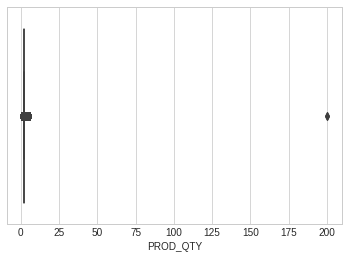

In [ ]:
sns.boxplot(x='PROD_QTY', data=x)

This is a case of extreme Outliers. That's the reason normal 0.99 quantile and 75 quartile(IQR) functions won't work.

In [ ]:
# Calculate the 1st and 99th percentiles
p1 = x['PROD_QTY'].quantile(0.01)
p99 = x['PROD_QTY'].quantile(0.999)

# Filter the dataframe to get the extreme outliers
outliers_qty = x[(x['PROD_QTY'] < p1) | (x['PROD_QTY'] > p99)]

In [ ]:
outliers_qty.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


In [ ]:
outliers_qty = x.query('PROD_QTY < (@Q1 - 1.5 * @IQR) | PROD_QTY > (@Q3 + 1.5 * @IQR)')#this won't work to get the extreme s

In [ ]:
x[x['PROD_QTY']==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


In [ ]:
x[x['LYLTY_CARD_NBR']==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


We drop the two Outliers

In [ ]:
x = x.drop(x[x['PROD_QTY'] == 200].index)

In [ ]:
x.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili,3,13.8,150


In [ ]:
missing_date = x[x['DATE'].isnull()]['DATE']
missing_date.head()

Series([], Name: DATE, dtype: datetime64[ns])

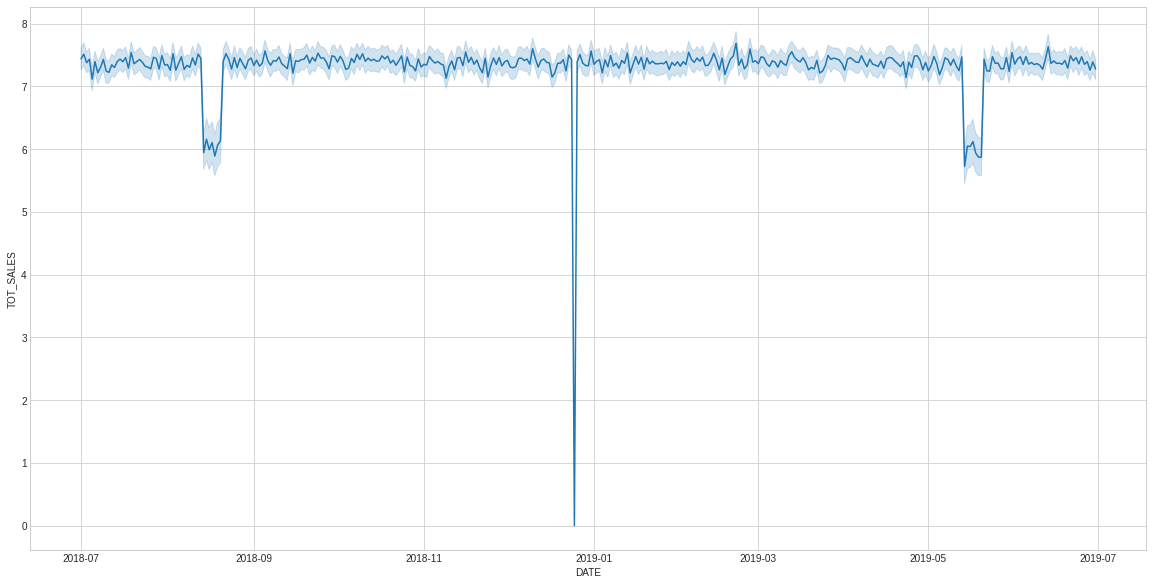

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(x='DATE', y='TOT_SALES', data=x, palette='colorblind')

As we See there are some fall in Sales between July 2018 and September 2018. 

(736876.0, 736938.0)

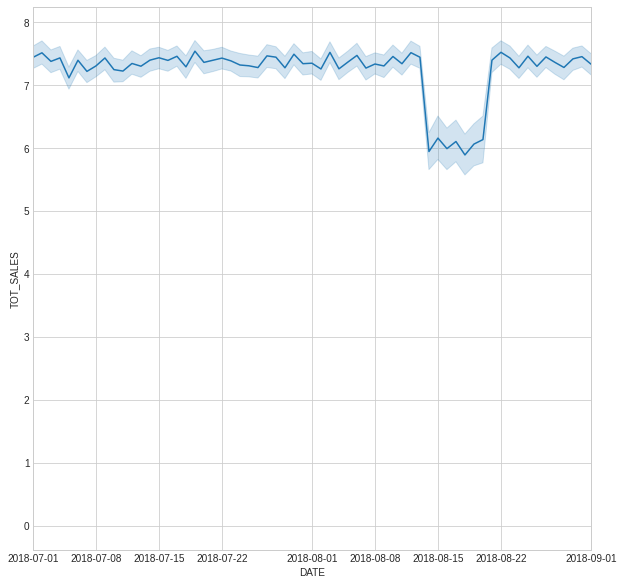

In [ ]:
# Get the Axes object for the plot
plt.figure(figsize=(10, 10))
ax = sns.lineplot(x='DATE', y='TOT_SALES', data=x, palette='colorblind').axes

# Set the x-axis limits to the desired range
ax.set_xlim(pd.Timestamp('2018-07-01'), pd.Timestamp('2018-09-01'))

And also between May, 2019 and July,2019.

(737180.0, 737241.0)

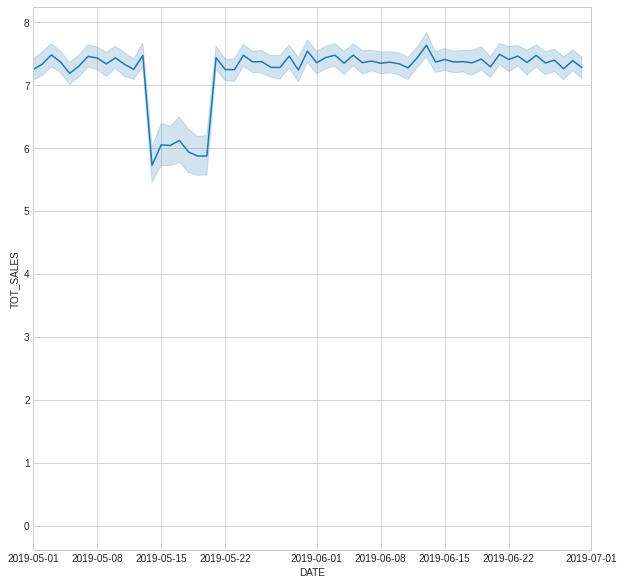

In [ ]:
# Get the Axes object for the plot
plt.figure(figsize=(10, 10))
ax = sns.lineplot(x='DATE', y='TOT_SALES', data=x, palette='colorblind').axes

# Set the x-axis limits to the desired range
ax.set_xlim(pd.Timestamp('2019-05-01'), pd.Timestamp('2019-07-01'))

Sales between December 2018 to 1st Jan. We got the highest Sales due to Christmas.

(737029.0, 737060.0)

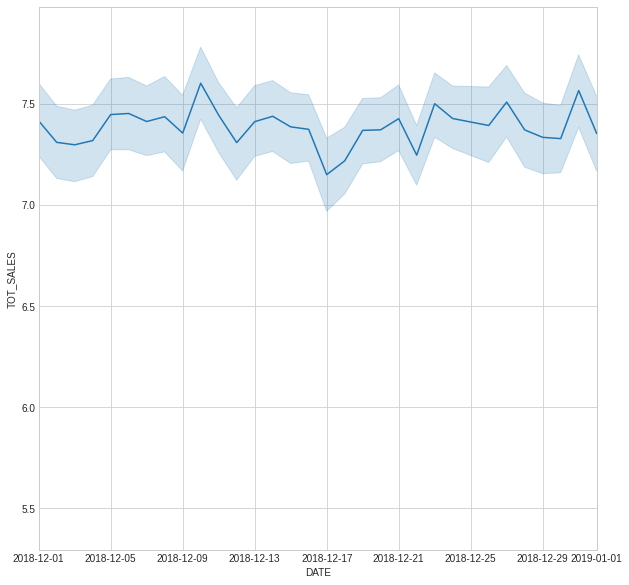

In [ ]:
# Get the Axes object for the plot
plt.figure(figsize=(10, 10))
ax = sns.lineplot(x='DATE', y='TOT_SALES', data=x, palette='colorblind').axes

# Set the x-axis limits to the desired range
ax.set_xlim(pd.Timestamp('2018-12-01'), pd.Timestamp('2019-01-01'))

In [ ]:
x.dtypes

DATE               object
STORE_NBR         float64
LYLTY_CARD_NBR    float64
TXN_ID            float64
PROD_NBR          float64
PROD_NAME          object
PROD_QTY          float64
TOT_SALES         float64
package_weight    float64
dtype: object

In [ ]:
# Create a list of all the dates in the desired range
all_dates = pd.date_range(start='2018-07-01', end='2019-06-30')

# Check if the length of the 'DATE' column is equal to the expected number of dates
if len(x['DATE']) == len(all_dates):
    print("All dates are present in the 'DATE' column")
else:
    print("There are missing dates in the 'DATE' column")

There are missing dates in the 'DATE' column


In [ ]:
missing_dates = all_dates[~all_dates.isin(x['DATE'])]
print("The following dates are missing:", missing_dates)

The following dates are missing: DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq='D')


We can see as all the stores are closed on Christmas that is the reason sales are 0 on that day.

In [ ]:
# Create a new row with the missing date and TOT_SALES value of 0
missing_date_row = pd.DataFrame({'DATE': ['2018-12-25'], 'TOT_SALES': [0]})

# Concatenate the new row with the existing dataframe
x = pd.concat([x, missing_date_row])

In [ ]:
x.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight
0,2018-10-17 00:00:00,1.0,1000.0,1.0,5.0,Natural Chip Compny SeaSalt,2.0,6.0,175.0
1,2019-05-14 00:00:00,1.0,1307.0,348.0,66.0,CCs Nacho Cheese,3.0,6.3,175.0
2,2019-05-20 00:00:00,1.0,1343.0,383.0,61.0,Smiths Crinkle Cut Chips Chicken,2.0,2.9,170.0
3,2018-08-17 00:00:00,2.0,2373.0,974.0,69.0,Smiths Chip Thinly SCreamOnion,5.0,15.0,175.0
4,2018-08-18 00:00:00,2.0,2426.0,1038.0,108.0,Kettle Tortilla ChpsHnyJlpno Chili,3.0,13.8,150.0


In [ ]:
x = x.reset_index(drop=True)

(737029.0, 737060.0)

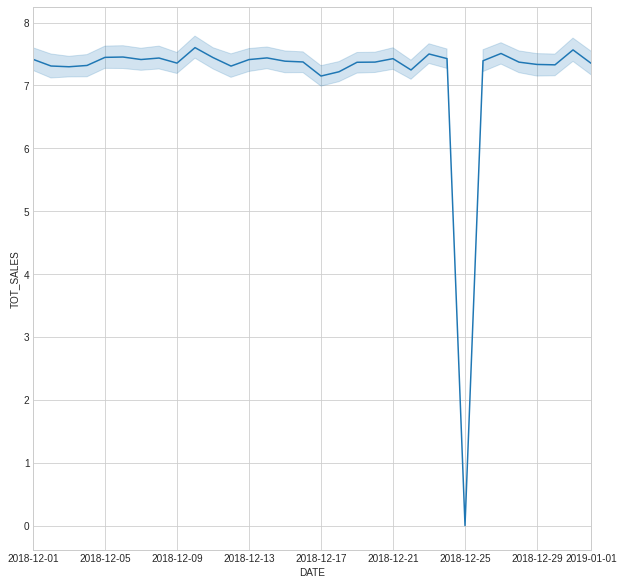

In [ ]:
# Convert the DATE column to a datetime type
x['DATE'] = pd.to_datetime(x['DATE'])

# Get the Axes object for the plot
plt.figure(figsize=(10, 10))
ax = sns.lineplot(x='DATE', y='TOT_SALES', data=x, palette='colorblind').axes

# Set the x-axis limits to the desired range
ax.set_xlim(pd.Timestamp('2018-12-01'), pd.Timestamp('2019-01-01'))

In [ ]:
x.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight
0,2018-10-17,1.0,1000.0,1.0,5.0,Natural Chip Compny SeaSalt,2.0,6.0,175.0
1,2019-05-14,1.0,1307.0,348.0,66.0,CCs Nacho Cheese,3.0,6.3,175.0
2,2019-05-20,1.0,1343.0,383.0,61.0,Smiths Crinkle Cut Chips Chicken,2.0,2.9,170.0
3,2018-08-17,2.0,2373.0,974.0,69.0,Smiths Chip Thinly SCreamOnion,5.0,15.0,175.0
4,2018-08-18,2.0,2426.0,1038.0,108.0,Kettle Tortilla ChpsHnyJlpno Chili,3.0,13.8,150.0


Creating Brand Name from the first Words

In [ ]:
x['BRAND'] = x['PROD_NAME'].str.split().str[0]

In [ ]:
x['BRAND'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites', nan], dtype=object)

But some Brand names are the same like Natural and NCC , Infuzions and Infzns , Red and RRD, Snbts and Sunbites. So, it needs to be equal.

In [ ]:
x['BRAND'] = x['BRAND'].replace({'NCC': 'Natural', 'Infzns': 'Infuzions', 'RRD': 'Red', 'Snbts': 'Sunbites','Dorito':'Doritos','Smith': 'Smiths','GrnWves': 'Grain'})

In [ ]:
x['BRAND'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'Cheezels', 'Infuzions',
       'Red', 'Pringles', 'Tyrrells', 'Cobs', 'French', 'Tostitos',
       'Cheetos', 'Woolworths', 'Sunbites', nan], dtype=object)

Time to deal with Customer Data

In [ ]:
cd.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245303 entries, 0 to 245302
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            245303 non-null  datetime64[ns]
 1   STORE_NBR       245302 non-null  float64       
 2   LYLTY_CARD_NBR  245302 non-null  float64       
 3   TXN_ID          245302 non-null  float64       
 4   PROD_NBR        245302 non-null  float64       
 5   PROD_NAME       245302 non-null  object        
 6   PROD_QTY        245302 non-null  float64       
 7   TOT_SALES       245303 non-null  float64       
 8   package_weight  245302 non-null  float64       
 9   BRAND           245302 non-null  object        
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 18.7+ MB


In [ ]:
# Create a new dataframe z by merging x and cd on the shared columns
shared_columns = list(set(x.columns) & set(cd.columns))
z = pd.merge(x, cd, on=shared_columns, how='left')

In [ ]:
z.isnull().sum()

DATE                0
STORE_NBR           1
LYLTY_CARD_NBR      1
TXN_ID              1
PROD_NBR            1
PROD_NAME           1
PROD_QTY            1
TOT_SALES           0
package_weight      1
BRAND               1
LIFESTAGE           1
PREMIUM_CUSTOMER    1
dtype: int64

In [ ]:
z.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1.0,1000.0,1.0,5.0,Natural Chip Compny SeaSalt,2.0,6.0,175.0,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1.0,1307.0,348.0,66.0,CCs Nacho Cheese,3.0,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1.0,1343.0,383.0,61.0,Smiths Crinkle Cut Chips Chicken,2.0,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2.0,2373.0,974.0,69.0,Smiths Chip Thinly SCreamOnion,5.0,15.0,175.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2.0,2426.0,1038.0,108.0,Kettle Tortilla ChpsHnyJlpno Chili,3.0,13.8,150.0,Kettle,MIDAGE SINGLES/COUPLES,Budget


Time to save the whole dataframe z as .csv file. 

In [ ]:
z.to_csv('QVI_data1.csv')
!cp QVI_data1.csv "drive/My Drive/"

Time for Data Analysis of the customer segment.
- Who spends the most on chips (total sales), describing customers by lifestage and
how premium their general purchasing behaviour is.
Total sales by LIFESTAGE and PREMIUM_CUSTOMER

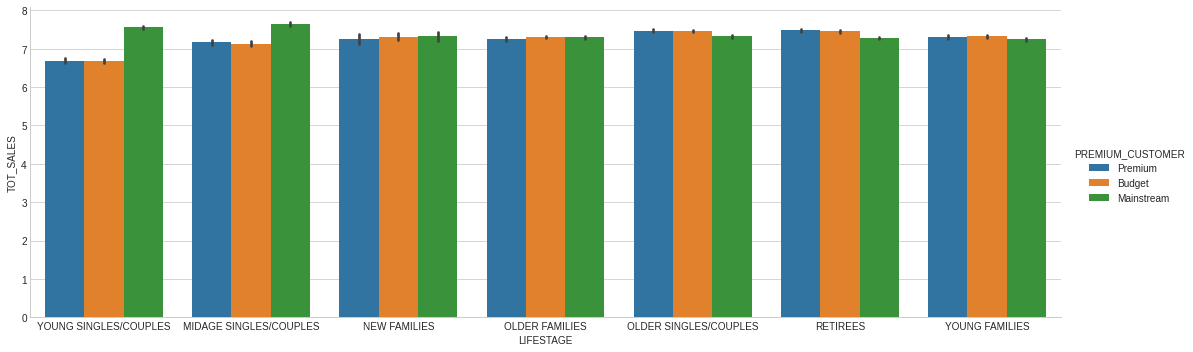

In [ ]:
lp=sns.catplot(x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', kind='bar',height=5,aspect=3, data=z)

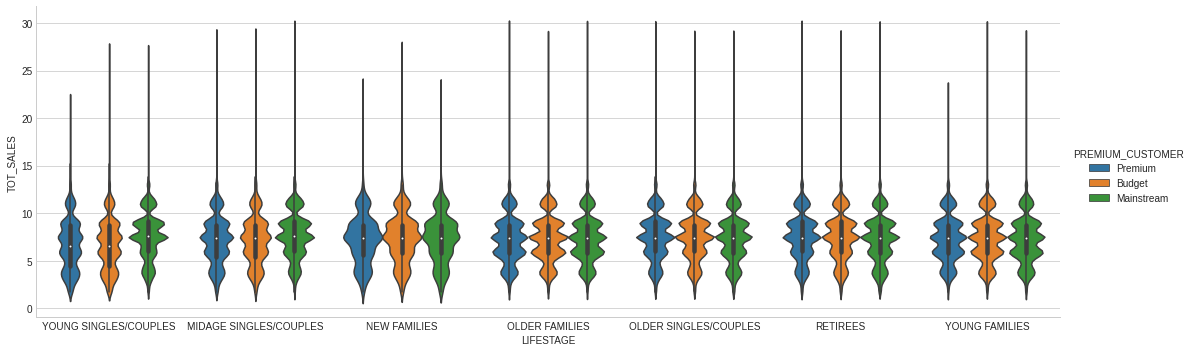

In [ ]:
sns.catplot(x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', kind='violin',height=5,aspect=3, data=z)

Mainstream Young and Midage Singles/Couples have highest Sales

- How many customers are in each segment,
Number of customers by LIFESTAGE and PREMIUM_CUSTOMER

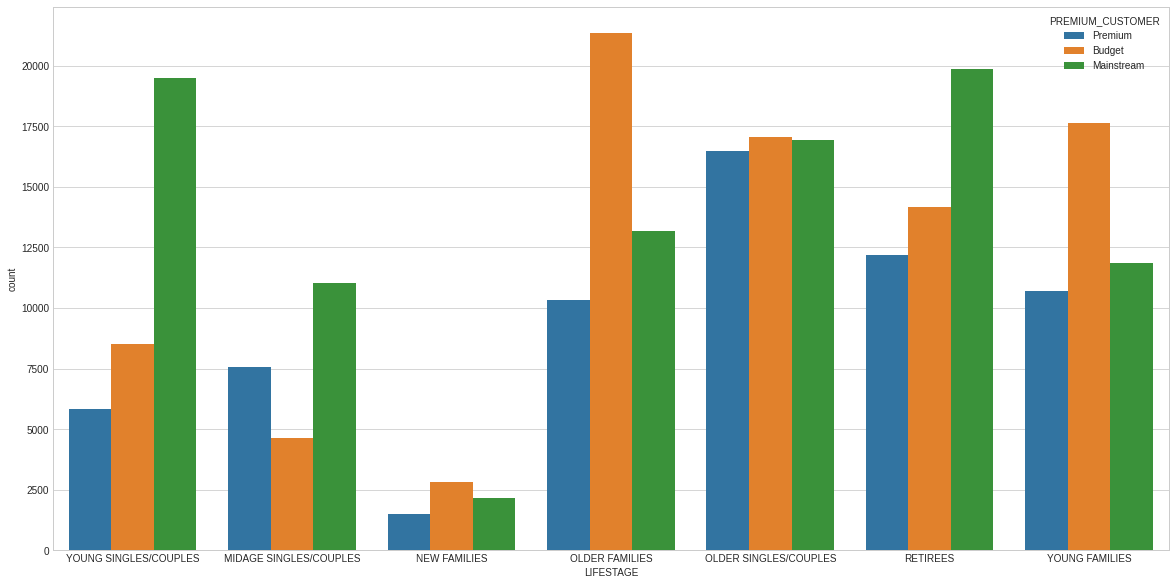

In [ ]:
# Create the countplot
plt.figure(figsize=(20,10))
sns.countplot(x='LIFESTAGE', hue='PREMIUM_CUSTOMER', data=z)

# Show the plot
plt.show()

There's Max number of Customer from Older Families Lifestage of budget category and lowest is New Families

- How many chips are bought per customer by segment,Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER

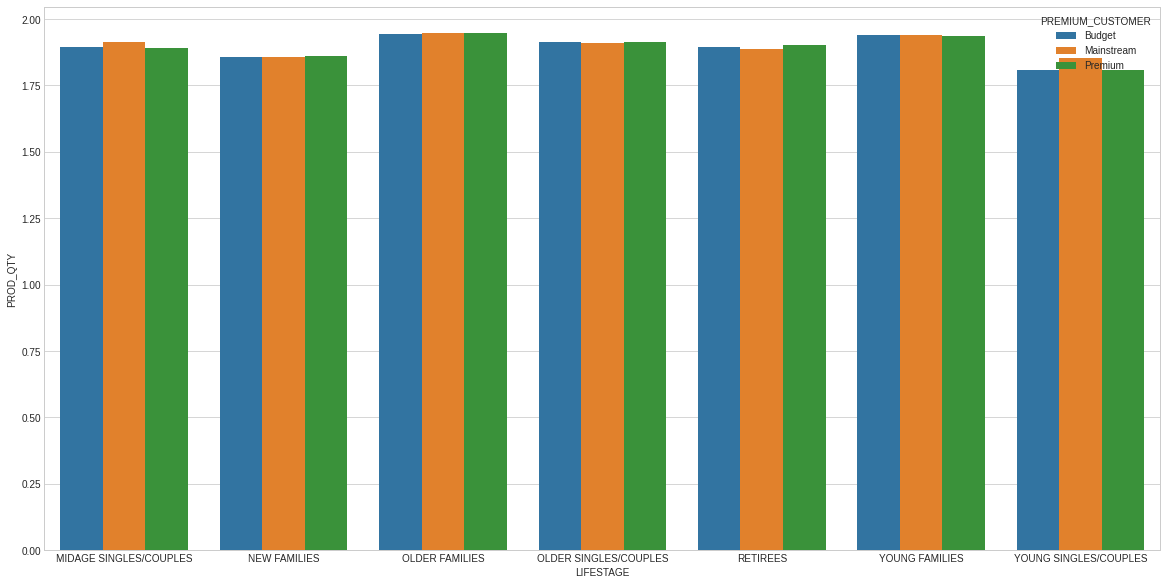

In [ ]:
# Group the data by LIFESTAGE and PREMIUM_CUSTOMER, and calculate the mean of PROD_QTY
mean_prod_qty = z.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().reset_index()

# Plot the mean PROD_QTY for each group
plt.figure(figsize=(20,10))
sns.barplot(x='LIFESTAGE', y='PROD_QTY', hue='PREMIUM_CUSTOMER', data=mean_prod_qty)

Older and Young families buy the most product qantity.

 What's the average chip price by customer segment? Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER.


Text(0.5, 1.0, 'Average Sales Price per Unit by LIFESTAGE and PREMIUM_CUSTOMER')

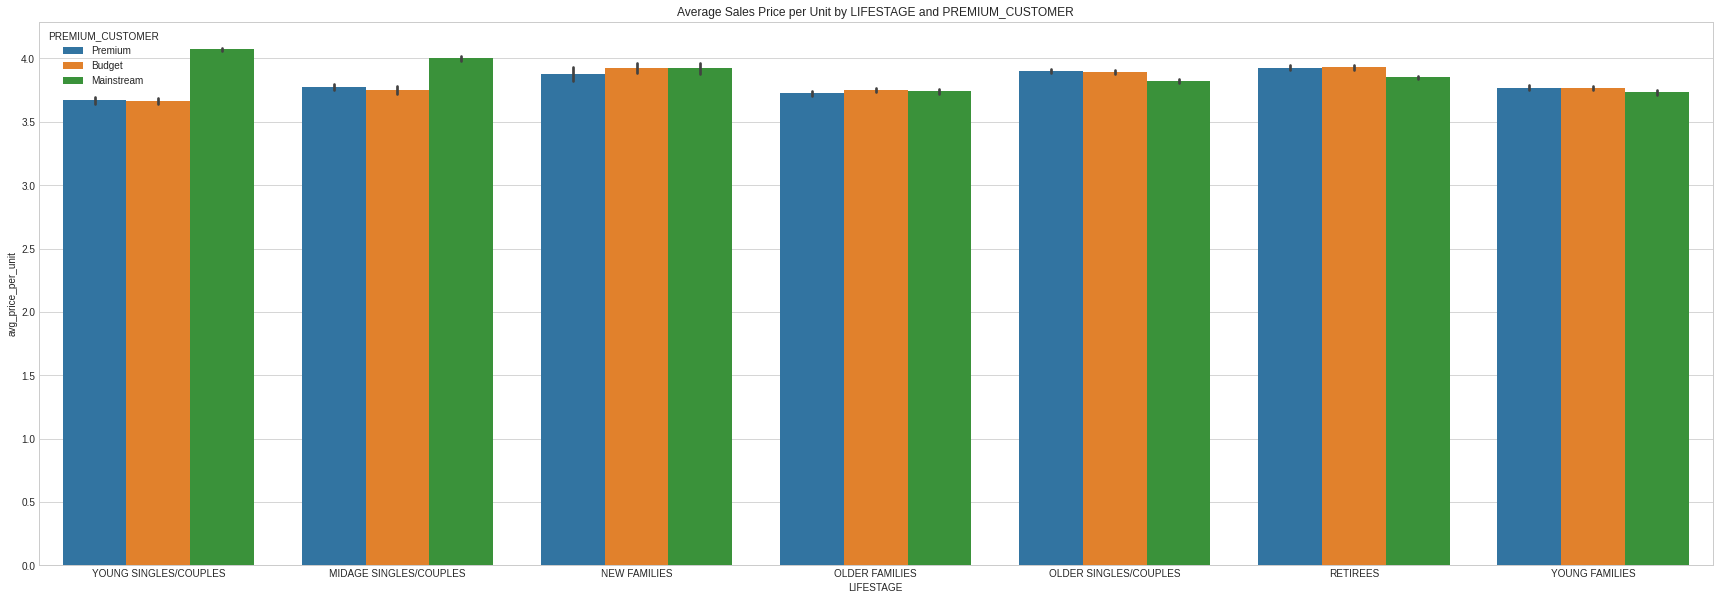

In [ ]:
# Calculate the average sales price per unit
z['avg_price_per_unit'] = z['TOT_SALES'] / z['PROD_QTY']
# Set the figure size to 10x10 inches
plt.figure(figsize=(30, 10))
# Plot the average sales price per unit
sns.barplot(x='LIFESTAGE', y='avg_price_per_unit', hue='PREMIUM_CUSTOMER', data=z)
# Add a title to the plot
plt.title('Average Sales Price per Unit by LIFESTAGE and PREMIUM_CUSTOMER')

Perform an independent t-test between mainstream vs premium and budget for midage 

In [ ]:
z.head()

,Unnamed: 0,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,avg_price_per_unit
0,0,2018-10-17,1.0,1000.0,1.0,5.0,Natural Chip Compny SeaSalt,2.0,6.0,175.0,Natural,YOUNG SINGLES/COUPLES,Premium,3.00
1,1,2019-05-14,1.0,1307.0,348.0,66.0,CCs Nacho Cheese,3.0,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2,2019-05-20,1.0,1343.0,383.0,61.0,Smiths Crinkle Cut Chips Chicken,2.0,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45
3,3,2018-08-17,2.0,2373.0,974.0,69.0,Smiths Chip Thinly SCreamOnion,5.0,15.0,175.0,Smiths,MIDAGE SINGLES/COUPLES,Budget,3.00
4,4,2018-08-18,2.0,2426.0,1038.0,108.0,Kettle Tortilla ChpsHnyJlpno Chili,3.0,13.8,150.0,Kettle,MIDAGE SINGLES/COUPLES,Budget,4.60


In [ ]:
midage_singles_couples = z[z['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES']
mainstream = midage_singles_couples[midage_singles_couples['PREMIUM_CUSTOMER'] == 'Mainstream']
premium = midage_singles_couples[midage_singles_couples['PREMIUM_CUSTOMER'] == 'Premium']
budget = midage_singles_couples[midage_singles_couples['PREMIUM_CUSTOMER'] == 'Budget']

t-statistic and p-value of mainstream and premium

In [ ]:
t_statistic, p_value = ttest_ind(mainstream['TOT_SALES'], premium['TOT_SALES'])

In [ ]:
print(p_value)

9.360185721288574e-40


In [ ]:
print(t_statistic)

13.226207667846136


t-statistic and p-value of mainstream and budget

In [ ]:
t_statistic, p_value = ttest_ind(mainstream['TOT_SALES'],budget['TOT_SALES'])
print(p_value)
print(t_statistic)

4.519276080440848e-34
12.198439870124963


Now We T-test for Young Singles/Couples

In [ ]:
young_singles_couples = z[z['LIFESTAGE']=='YOUNG SINGLES/COUPLES']
mainstream_y = young_singles_couples[young_singles_couples['PREMIUM_CUSTOMER'] == 'Mainstream']
premium_y = young_singles_couples[young_singles_couples['PREMIUM_CUSTOMER'] == 'Premium']
budget_y = young_singles_couples[young_singles_couples['PREMIUM_CUSTOMER'] == 'Budget']

t-statistic and p-value of mainstream and budget 

In [ ]:
t_statistic, p_value = ttest_ind(mainstream_y['TOT_SALES'],budget_y['TOT_SALES'])
print(p_value)
print(t_statistic)

1.84274506898073e-157
26.90699431100381


t-statistic and p-value of mainstream and premium

In [ ]:
t_statistic, p_value = ttest_ind(mainstream_y['TOT_SALES'],premium_y['TOT_SALES'])
print(p_value)
print(t_statistic)

3.422052038491271e-119
23.33673787758433


The t-test results in a p-value of less than 0.05 so there is statistically significant difference between the two groups, i.e. the unit price for mainstream,
young and mid-age singles and couples ARE significantly higher than
that of budget or premium, young and midage singles and couples.

To see which Brands are the most popular among the mainstream Young Singles/Couples




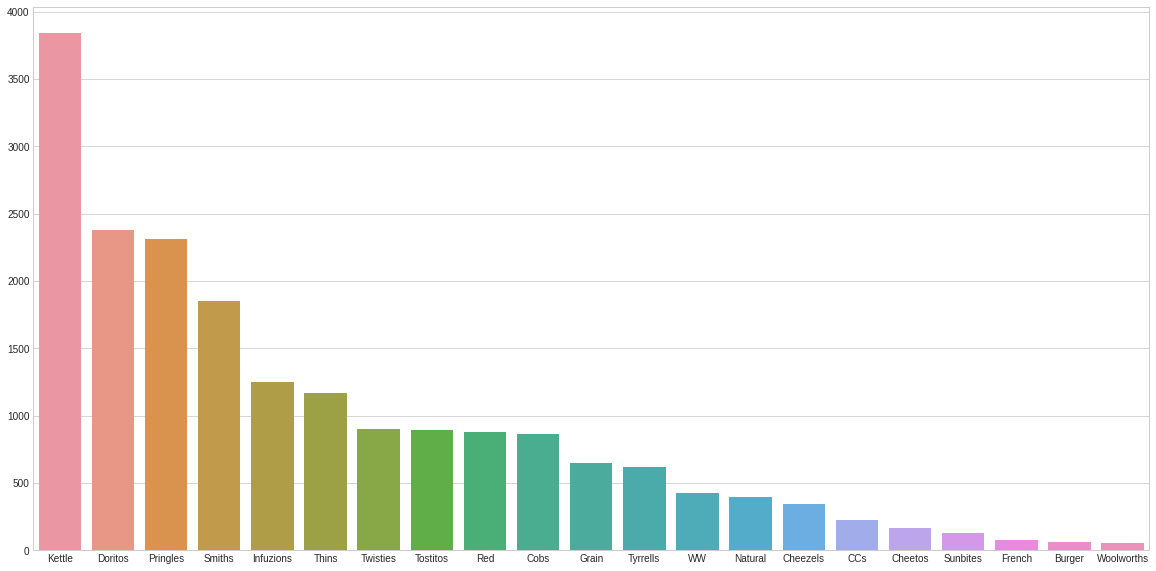

In [ ]:
# Get the value counts for the 'BRAND' column
brand_counts = mainstream_y['BRAND'].value_counts()
plt.figure(figsize=(20,10))
# Plot the value counts as a barplot
sns.barplot(x=brand_counts.index, y=brand_counts.values)

As We can see Kettle and Doritos are the highest selling Brands closely followed by Pringles.

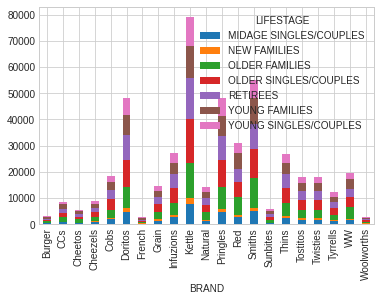

In [ ]:
# Create a pivot table showing the total number of chips bought by each BRAND for each customer segment
pivot_table = z.pivot_table(index='BRAND', columns='LIFESTAGE', values='PROD_QTY', aggfunc='sum')
# Plot the results as a bar chart
pivot_table.plot(kind='bar', stacked=True)

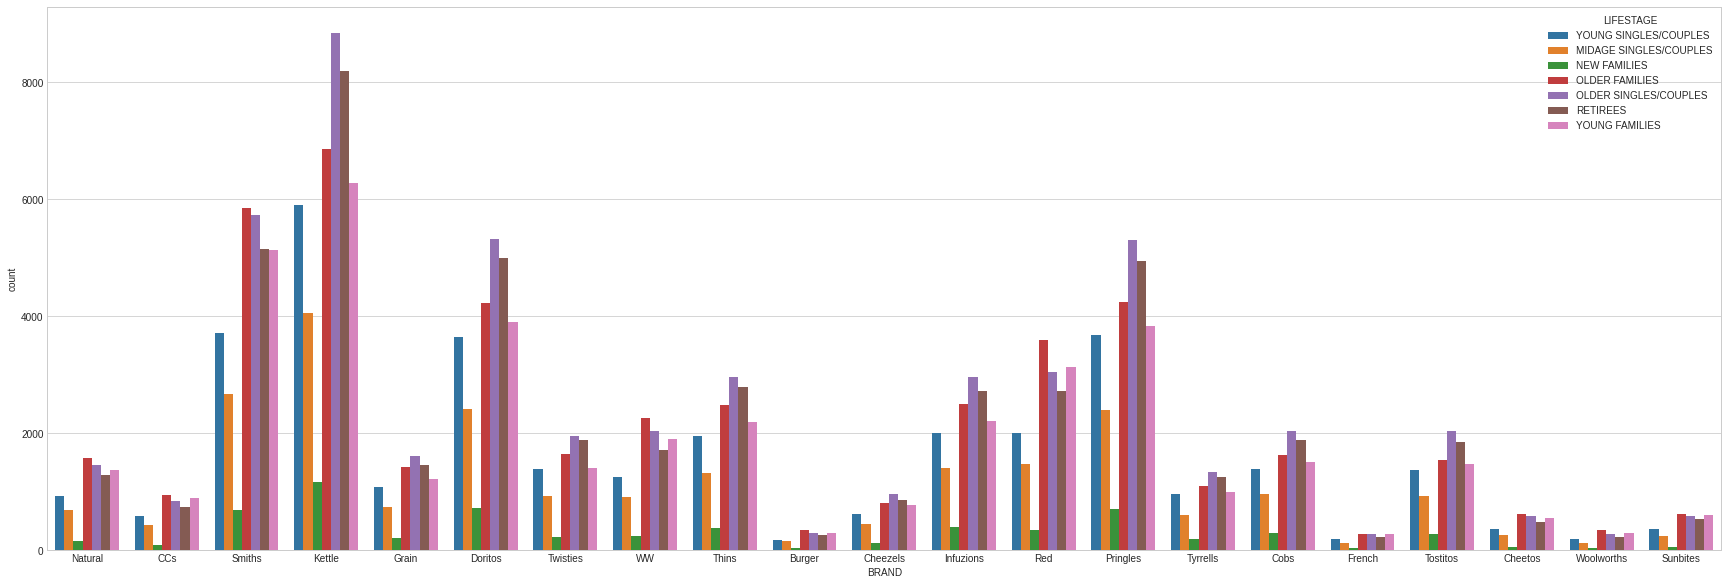

In [ ]:
plt.figure(figsize=(30, 10))

# Plot the pivot plot
sns.countplot(x='BRAND', hue='LIFESTAGE', data=z)

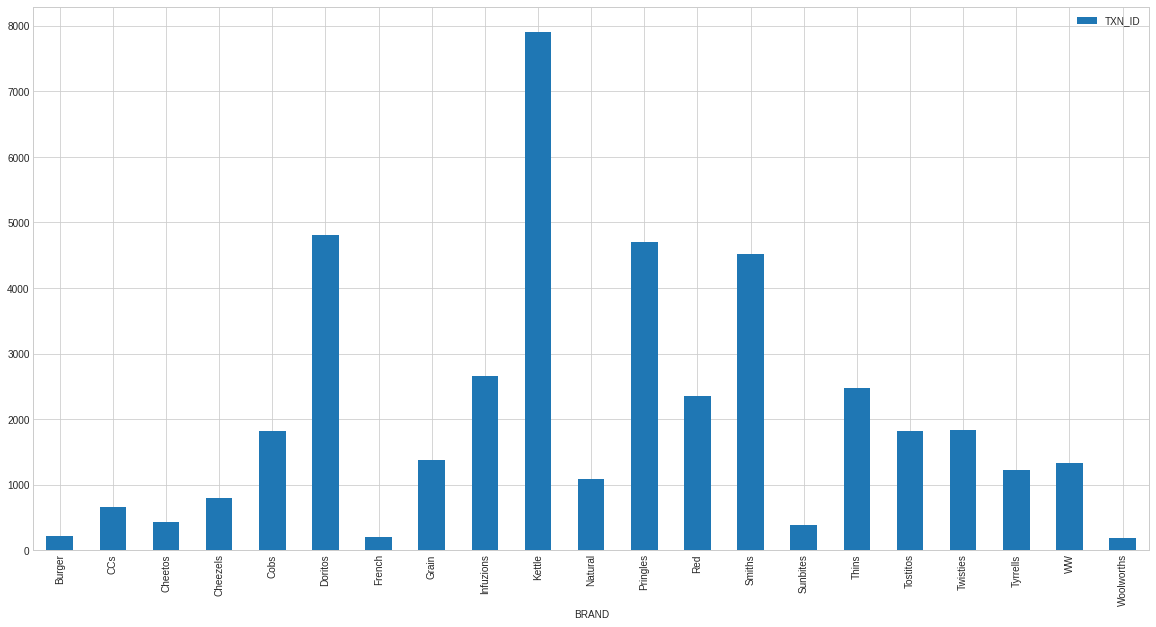

In [ ]:
# Filter the data to include only rows with 'MIDAGE SINGLES/COUPLES' and 'YOUNG SINGLES/COUPLES' customer segments and 'Mainstream' premium customers
filtered_data = z[(z['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') | (z['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (z['PREMIUM_CUSTOMER'] == 'Mainstream')]

# Create a pivot table to count the number of occurrences of each brand
pivot = pd.pivot_table(filtered_data, index='BRAND', values='TXN_ID', aggfunc='count')

# Plot the pivot table as a bar plot
pivot.plot(kind='bar', figsize=(20,10))

Young and Midage Singles/Couples groups love Kettle and Doritos

In [ ]:
mainstream_y.head()


,Unnamed: 0,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,package_weight,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,avg_price_per_unit
220018,220018,2018-08-16,1.0,1020.0,26.0,19.0,Smiths Crinkle Cut SnagSauce,1.0,2.6,150.0,Smiths,YOUNG SINGLES/COUPLES,Mainstream,2.6
220019,220019,2018-08-17,1.0,1163.0,188.0,46.0,Kettle Original,1.0,5.4,175.0,Kettle,YOUNG SINGLES/COUPLES,Mainstream,5.4
220020,220020,2018-08-14,1.0,1291.0,333.0,27.0,WW Supreme Cheese Corn Chips,1.0,1.9,200.0,WW,YOUNG SINGLES/COUPLES,Mainstream,1.9
220021,220021,2019-05-15,3.0,3031.0,1227.0,14.0,Smiths Crnkle Chip Orgnl Big Bag,1.0,5.9,380.0,Smiths,YOUNG SINGLES/COUPLES,Mainstream,5.9
220022,220022,2019-05-18,3.0,3118.0,1574.0,62.0,Pringles Mystery Flavour,1.0,3.7,134.0,Pringles,YOUNG SINGLES/COUPLES,Mainstream,3.7


Looking through package_size per brands for Young Singles/Couples

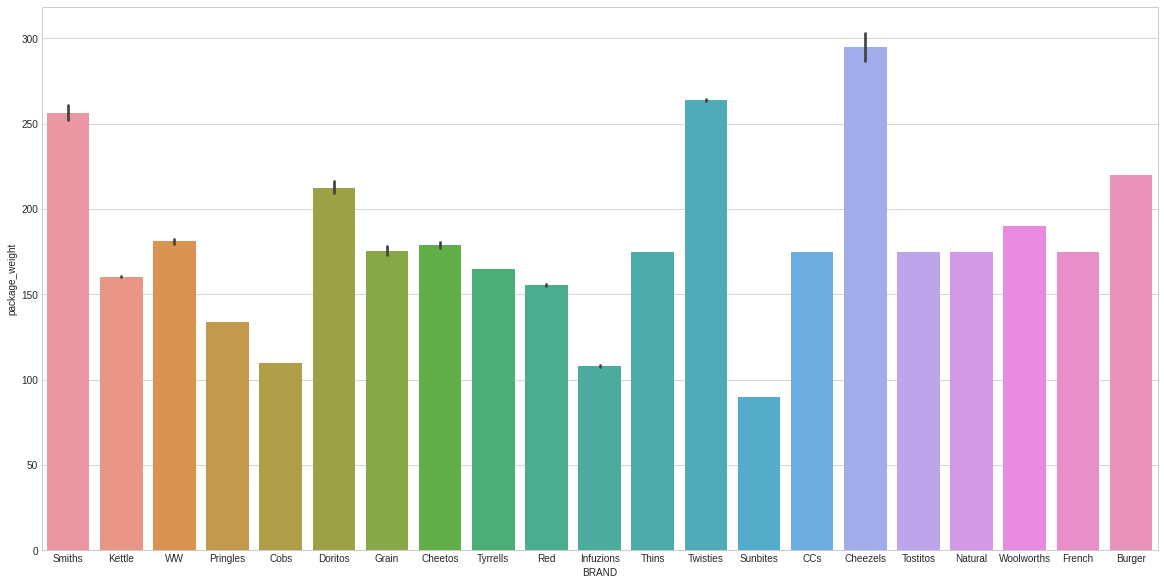

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='BRAND', y= 'package_weight', data= mainstream_y)

It's clear that for Brands like Smiths,Cheezles, Twisties are the top preffered for large sized chips.


Looking through package_size per brands for Midage Singles/Couples

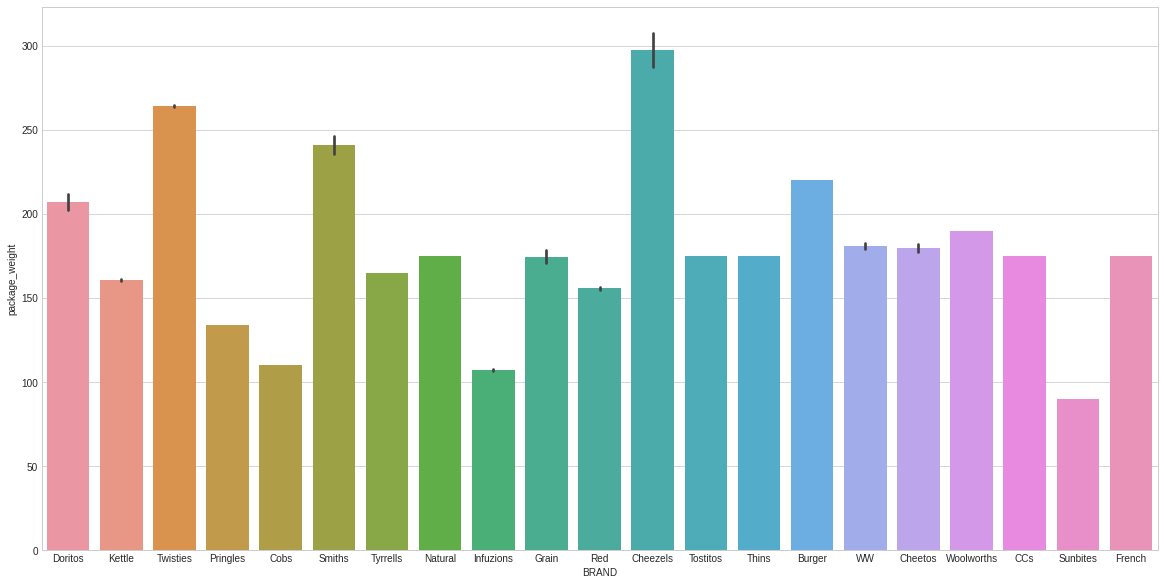

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='BRAND', y= 'package_weight', data= mainstream)

Most preferred Brand are the likes of Cheezles with highest package_weight followed by Twisties.

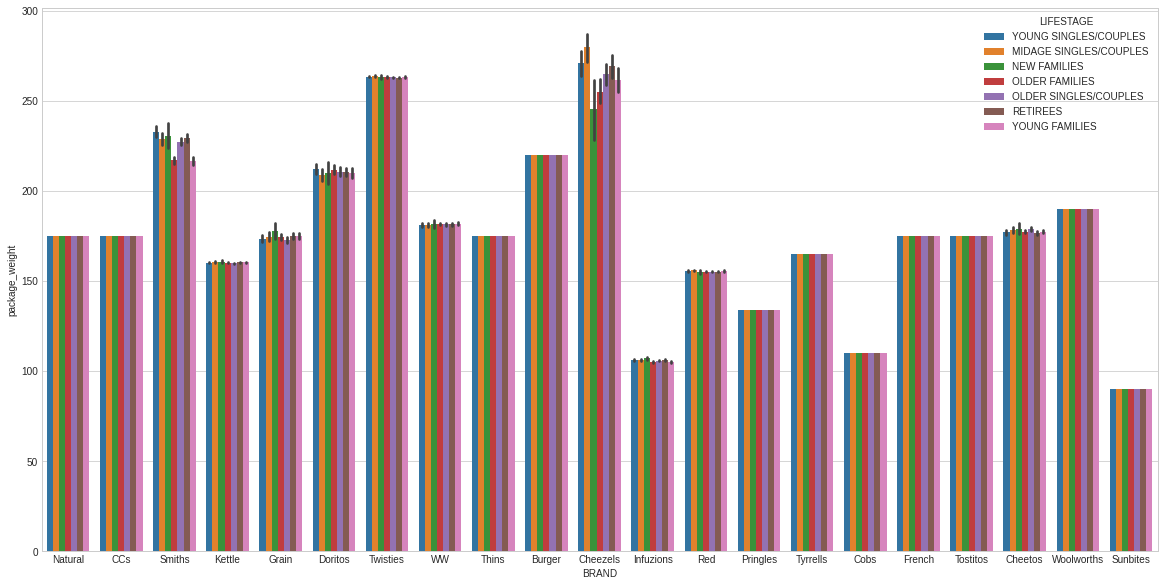

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='BRAND', y= 'package_weight',hue= 'LIFESTAGE', data= z)

Young and Midage Singles/Couples prefer bigger package size in general. 